**Question 1: XOR Gate Classification**


Create the XOR gate's truth table dataset.

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# XOR truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([0, 1, 1, 0])  # XOR output


Implement the perceptron model and train it using the XOR dataset using MCP(McCulloch
Pitts) Neuron.

Predictions: [1 1 0 0]
Actual: [0 1 1 0]
Single Layer Perceptron Accuracy: 50.00%


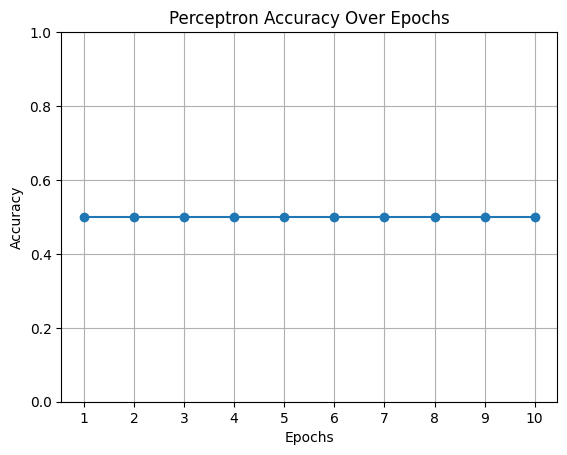

In [10]:
# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.accuracy_per_epoch = []

    def activation(self, x):
        # Step activation function (MCP)
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            # Calculate accuracy for this epoch
            predictions = self.predict(X)
            accuracy = accuracy_score(y, predictions)
            self.accuracy_per_epoch.append(accuracy)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Predict
predictions = perceptron.predict(X)
print(f"Predictions: {predictions}")
print(f"Actual: {y}")
accuracy_slp = accuracy_score(y, predictions)
print(f"Single Layer Perceptron Accuracy: {accuracy_slp * 100:.2f}%")

# Plot accuracy over epochs
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracy_per_epoch, marker='o')
plt.title('Perceptron Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(1, perceptron.epochs + 1))
plt.grid()
plt.show()


Implement XOR using Multi-Layer Perceptron.

Epoch 0, Loss: 0.702091634273529
Epoch 1000, Loss: 0.6927847862243652
Epoch 2000, Loss: 0.6917515993118286
Epoch 3000, Loss: 0.6864299178123474
Epoch 4000, Loss: 0.6453931331634521
Epoch 5000, Loss: 0.5354781746864319
Epoch 6000, Loss: 0.44181662797927856
Epoch 7000, Loss: 0.12505555152893066
Epoch 8000, Loss: 0.05773872137069702
Epoch 9000, Loss: 0.036904964596033096
Predictions: [0. 1. 1. 0.]
Actual: [0 1 1 0]
Multi-Layer Perceptron Accuracy: 100.00%


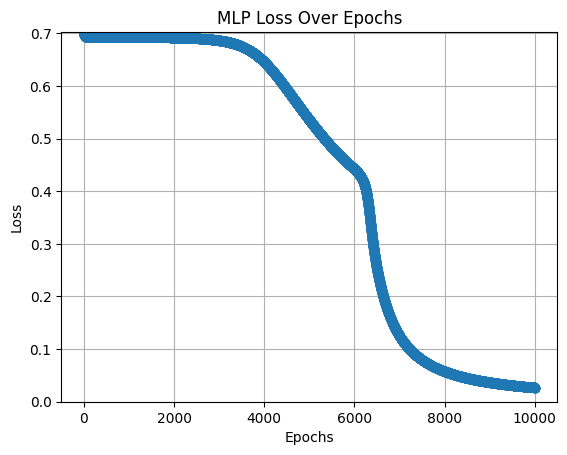

In [13]:

import torch
import torch.nn as nn
import torch.optim as optim

# Define MLP model
class XOR_MLP(nn.Module):
    def __init__(self):
        super(XOR_MLP, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input features, 2 neurons in hidden layer
        self.output = nn.Linear(2, 1)  # 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation function for hidden layer
        x = torch.sigmoid(self.output(x))  # Activation function for output layer
        return x

# Prepare data
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# Initialize model, loss function, and optimizer
model = XOR_MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train MLP
epochs = 10000
loss_values = []  # To store loss values for plotting

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero out gradients
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()  # Backpropagation
    optimizer.step()

    loss_values.append(loss.item())  # Store loss value

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate the MLP
with torch.no_grad():
    predictions = model(X_tensor).round()  # Get binary output
    accuracy_mlp = accuracy_score(y, predictions.numpy().flatten())
    print(f"Predictions: {predictions.numpy().flatten()}")
    print(f"Actual: {y}")
    print(f"Multi-Layer Perceptron Accuracy: {accuracy_mlp * 100:.2f}%")

# Plot loss over epochs
plt.plot(range(epochs), loss_values, marker='o')
plt.title('MLP Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(loss_values))  # Set y-axis limit
plt.grid()
plt.show()


**Observe and discuss the perceptron's performance in this scenario.**

The single layer perceptron cannot correctly classify all the XOR CLassification tasks. The prediction is only 50% accurate which confirms that the perceptron does not learn the XOR function properly.
**Reason for Poor Performance:**
XOR is not linearly separable
Inability to form non-linear boundaries

The multi-layer perceptron (MLP) successfully classifies all the XOR gate outputs with 100% accuracy.
Reason for Success:
Non-linear separation

The loss value steadily decreases as the number of training epochs increases, which signifies that the MLP is progressively learning to reduce its error through weight updates during backpropagation.